In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# configuring figure/plot params
custom_params = {'figure.figsize':(17,9)} 
sns.set_theme(style="whitegrid", rc=custom_params)

In [3]:
mnist_data = pd.read_csv('mnist.csv').values
df_describe = pd.DataFrame(mnist_data)
df_describe.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


# Data Exploration

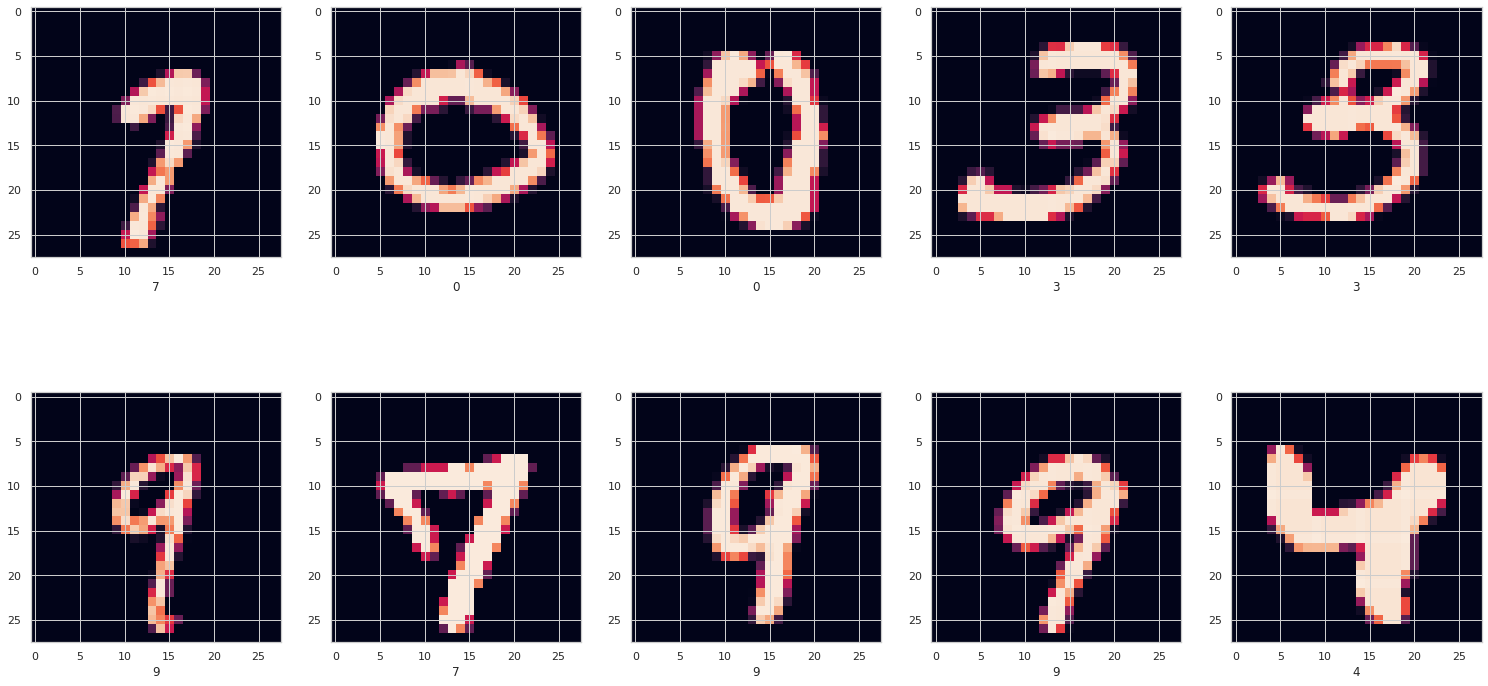

In [4]:
labels = mnist_data[:,0] # 0 to 9
digits = mnist_data[:, 1:] # 42000 digits
img_size = 28

fig = plt.figure(figsize=(26,13))
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    random_index = random.randrange(0, len(digits))
    plt.imshow(digits[random_index].reshape(img_size, img_size))
    plt.xlabel(str(labels[random_index]))
plt.show()

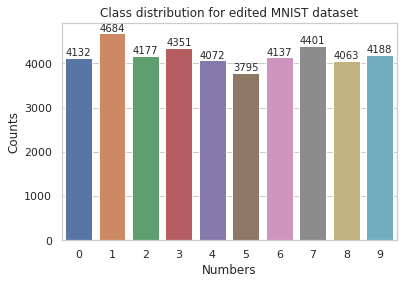

In [5]:
unique, counts = np.unique(labels, return_counts=True)
ax = sns.barplot(x=unique,y=counts)
ax.bar_label(ax.containers[0])
plt.title("Class distribution for edited MNIST dataset")
plt.ylabel("Counts")
plt.xlabel("Numbers")
plt.show()

# Part 1. INK Feature Models
- (Zero mean and SD=1) Multinomial Logit -> Ink Feature
- (Zero mean and SD=1) MN Logit -> Ink Feature + Our own special feature

In [6]:
# creating ink feature
ink = np.array([sum(row) for row in digits])
ink_mean = [np.mean(ink[labels == i]) for i in range(10)] # mean for each digit
ink_std = [np.std(ink[labels == i]) for i in range(10)] # std for each digit
print(f"{ink}\n{ink_mean}\n{ink_std}\n")
print(f"{np.size(ink)}, {np.size(ink_mean)}, {np.size(ink_std)}")

[16649 44609 13425 ... 31504 26381 18178]
[34632.40755082285, 15188.466268146884, 29871.099353603066, 28320.188002757986, 24232.72249508841, 25835.920421607378, 27734.917331399563, 22931.244262667577, 30184.148412503077, 24553.75]
[8461.892043158483, 4409.461697281539, 7653.006198983366, 7574.104535679545, 6374.633457092554, 7526.602988920305, 7530.503187255003, 6168.3408781754315, 7777.396357381105, 6465.231330430596]

42000, 10, 10


In [7]:
# i didn't see much difference between scaled and non-scaled ink
scaled_ink = (ink - np.mean(ink)) / np.std(ink)
print(scaled_ink)

[-1.09834377  2.11949181 -1.46938461 ...  0.61127524  0.02168398
 -0.92237558]


In [8]:
# our new feature - whitespace between numbers
# not just the opposite of ink, but the whitespace between a digit's
# rows and columns; 0 has a LOT of whitespace, 1 doesn´t have that much
def get_whitespace_feature(digits):
    ws = np.zeros(len(digits))
    
    print(ws)
    return ws

In [9]:
ws = get_whitespace_feature(digits)
ws_mean = [np.mean(ink[labels == i]) for i in range(10)] # mean for each digit
ws_std = [np.std(ink[labels == i]) for i in range(10)] # sd for each digit
print(f"{ws}\n{ws_mean}\n{ws_std}\n")
print(f"{np.size(ws)}, {np.size(ws_mean)}, {np.size(ws_std)}")

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[34632.40755082285, 15188.466268146884, 29871.099353603066, 28320.188002757986, 24232.72249508841, 25835.920421607378, 27734.917331399563, 22931.244262667577, 30184.148412503077, 24553.75]
[8461.892043158483, 4409.461697281539, 7653.006198983366, 7574.104535679545, 6374.633457092554, 7526.602988920305, 7530.503187255003, 6168.3408781754315, 7777.396357381105, 6465.231330430596]

42000, 10, 10


In [10]:
# setting up pipeline to facilitate modelling
# and consolidate training and testing datasets
# https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = ink.reshape(-1, 1) # reshaping since it's a single feature
y = labels
# I know the instructions mention we don´t need to do this now,
# but I´d rather keep all models (reasonably) consistent
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42, 
                                                    test_size=0.30)

# this pipeline logic is so we don´t leak data from the test set into the training set
scaled_logit = make_pipeline(StandardScaler(), LogisticRegression())
scaled_logit.fit(X_train, y_train)  # apply scaling on training data
scaled_logit.score(X_test, y_test)
y_pred = scaled_logit.predict(X_test)

In [16]:
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def show_results(model_desc, y_test, y_pred):
    print(f"\nResults for {model_desc}\n")
    print(classification_report(y_test, y_pred, zero_division=0)) # hiding zero division warn
    cm = confusion_matrix(y_test, y_pred, labels=scaled_logit.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=scaled_logit.classes_)
    disp.plot()
    plt.show()


Results for MN LOGIT - INK FEATURE

              precision    recall  f1-score   support

           0       0.24      0.59      0.34      1200
           1       0.43      0.82      0.57      1389
           2       0.15      0.06      0.08      1294
           3       0.13      0.24      0.17      1355
           4       0.00      0.00      0.00      1222
           5       0.00      0.00      0.00      1085
           6       0.00      0.00      0.00      1256
           7       0.15      0.33      0.21      1359
           8       0.05      0.00      0.00      1209
           9       0.14      0.12      0.13      1231

    accuracy                           0.23     12600
   macro avg       0.13      0.22      0.15     12600
weighted avg       0.14      0.23      0.16     12600



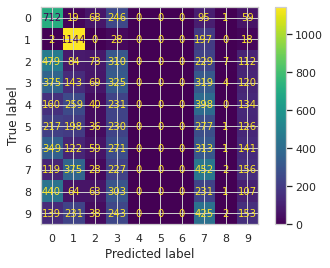

In [17]:
show_results("MN LOGIT - INK FEATURE", y_test, y_pred)

# Part 2. All Pixel Value Models
- (Regularized?) MN Logit (w/ LASSO penalty) -> 784(28*28 pixels) features (all pixel values)
- Support Vector Machines (SVM)

In [13]:
# find a way to remove all pixels that always have constant value

logreg = sklearn.linear_model.LogisticRegression(penalty='l1', c=1,solver='saga')
# saga is the only solver that supports l1 penalty and multi-class problems
#arr = np.array([ink_mean, ink_std])
#print(pd.DataFrame(arr))
#print(df.loc[:, (df.sum() > 0).all()])

NameError: name 'sklearn' is not defined